In [1]:
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
import matplotlib.colors as cl
from matplotlib.gridspec import GridSpec
from cartopy.util import add_cyclic_point
from copy import copy  
import pandas as pd
import functools
import os
from glob import glob
import nc_time_axis
import cftime
from utils import subset_vars, trans_z, make_yticks

In [2]:
#subset_vars('./subs/hist','subset_vars1.nc')

In [ ]:
ds = xr.open_dataset('subset_vars.nc')

In [4]:
tfrz=273.15
zdiff=0.5
secperyear=60*60*24*365


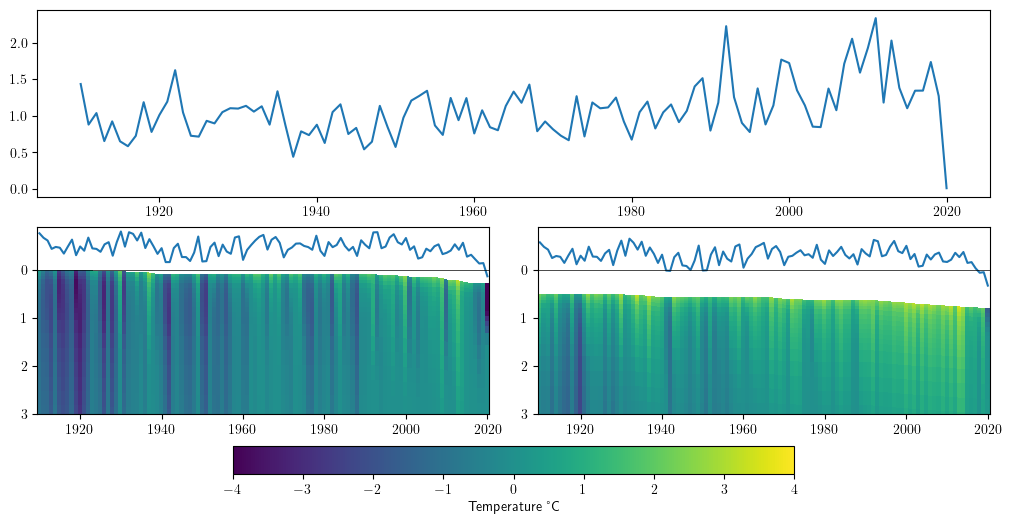

In [37]:

# Turn on latex interpreter
plt.rcParams['text.usetex'] = True


fig = plt.figure(layout="constrained")
#figure ziae
fig.set_size_inches(10,7)

cmap=matplotlib.cm.bwr

# set layout 
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))
ax[0] = fig.add_subplot(gs[1, 0])
ax[1] = fig.add_subplot(gs[1, 1])






#group by year and get 
ds1 = ds.groupby('time.year').mean()
t1,z1,tsoi1 = trans_z(ds=ds1,varname='TSOI',col=0,depth=8,timevar='year')
t2,z2,tsoi2 = trans_z(ds=ds1,varname='TSOI',col=1,depth=8,timevar='year')
##
#convert second tile elevation right away
z2=z2+zdiff

# get abosolute snow height
dsd = ds['SNOW_DEPTH'].groupby('time.year').max()
sh1 = - dsd.values[:,0] + z1[:,0] 
sh2 = - dsd.values[:,1] + z2[:,1]

# get limits
ylim = [ 3, round(min(np.min(sh1),np.min(sh2))*10)/10-0.1]
#set ticks
#yticks1,ytick_lbls1 = get_yticks(ylim,z1[0,0],0.5)
#yticks2,ytick_lbls2 = get_yticks(ylim,z2[0,0],0.5)

#make colormap limits uniform for the plots.
vmax=round(max(np.max(tsoi1),np.max(tsoi2))-tfrz)
vmin=round(max(np.min(tsoi1),np.min(tsoi2))-tfrz)
vmax=max(abs(vmax),abs(vmin))
vmin=-vmax

fch4=ds1['FCH4']
years=ds1["year"]
p0 = ax1.plot(years,fch4*secperyear*1000)


p1=ax[0].pcolor(t1,z1,tsoi1-tfrz,vmax=vmax,vmin=vmin)
ax[0].plot(t1[:,0],sh1)
xlim=list(ax[0].get_xlim())
ax[0].plot(xlim,[0.0,0.0],'k-',lw=0.5)

ax[0].set_ylim(ylim)
#ax[0].set_yticks(yticks1,labels=ytick_lbls1)


p2=ax[1].pcolor(t2,z2,tsoi2-tfrz,vmax=vmax,vmin=vmin)
ax[1].plot(t2[:,0],sh2)
xlim=list(ax[0].get_xlim())
ax[1].plot(xlim,[0.0,0.0],'k-',lw=0.5)
#limit pos,neg inverts axis itself
ax[1].set_ylim(ylim)
#ax[1].set_yticks(yticks2,labels=ytick_lbls2)
fig.colorbar(p2, ax=ax, shrink=0.6,use_gridspec=True, location='bottom',label='Temperature \N{DEGREE SIGN}C')